__Алгоритм Бойера-Мура-Хорспула__

Самая худшая скорость: O(N*M)

Объем вычислений: O(N/M)

Оптимизирует процесс поиска образа в строке

Состоит из 2 этапов:

 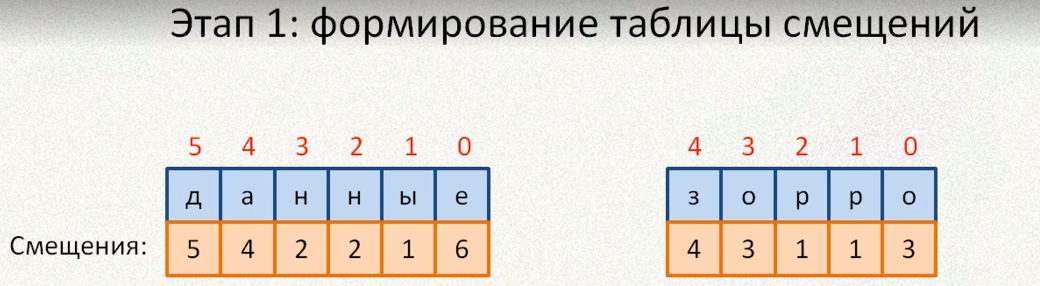

Смещение для последнего символа формируется по следующему правилу:

Если его не было в образе - смещение для него определяется длиной образа.

Если был в образе - определяется числом, которому соотвествует его символ в образе


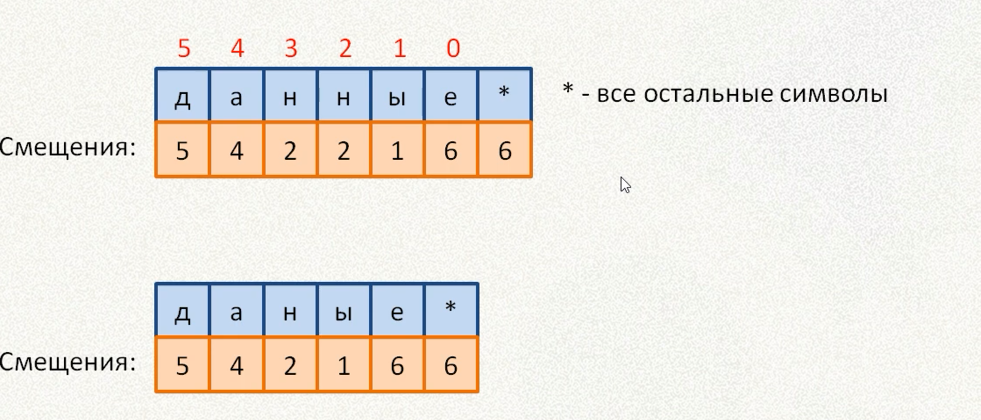

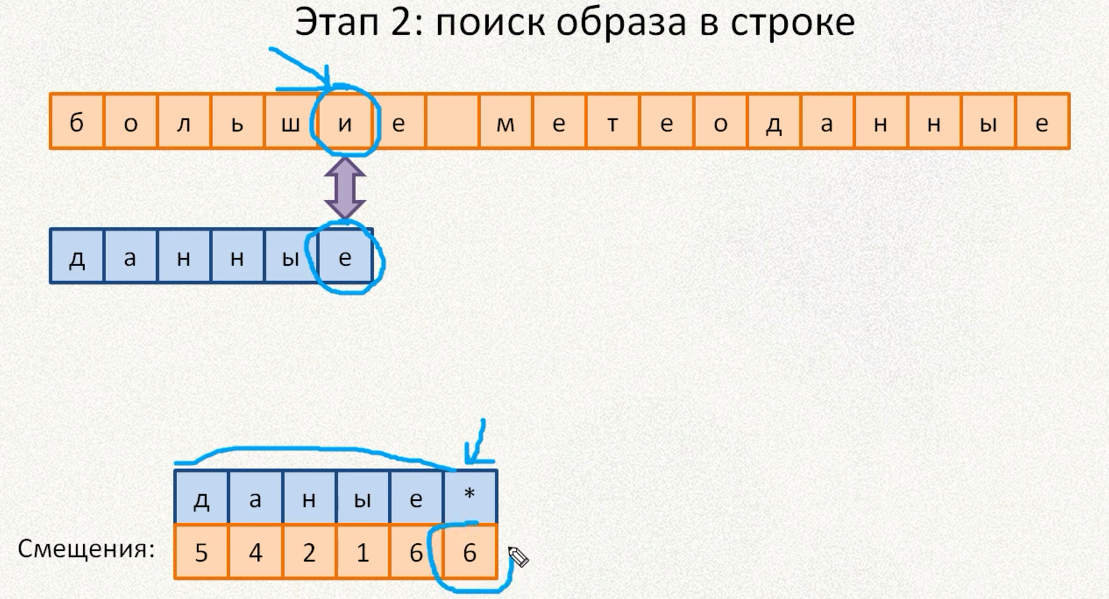

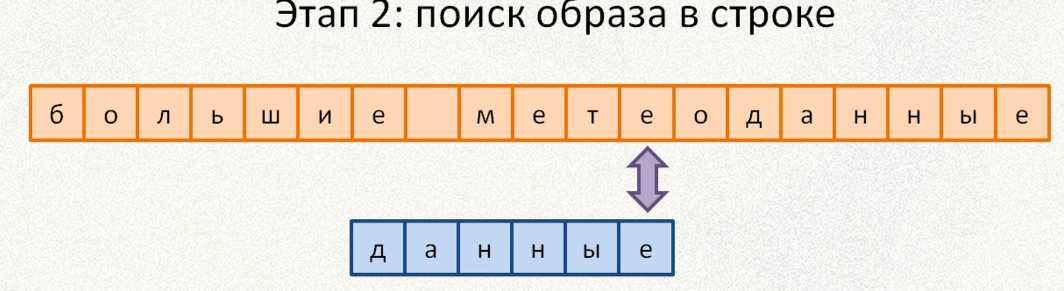

Согласно правилу этого алгоритма, если несовпадение происходит не для последнего символа, а для любого другого - следует уже брать символ из 

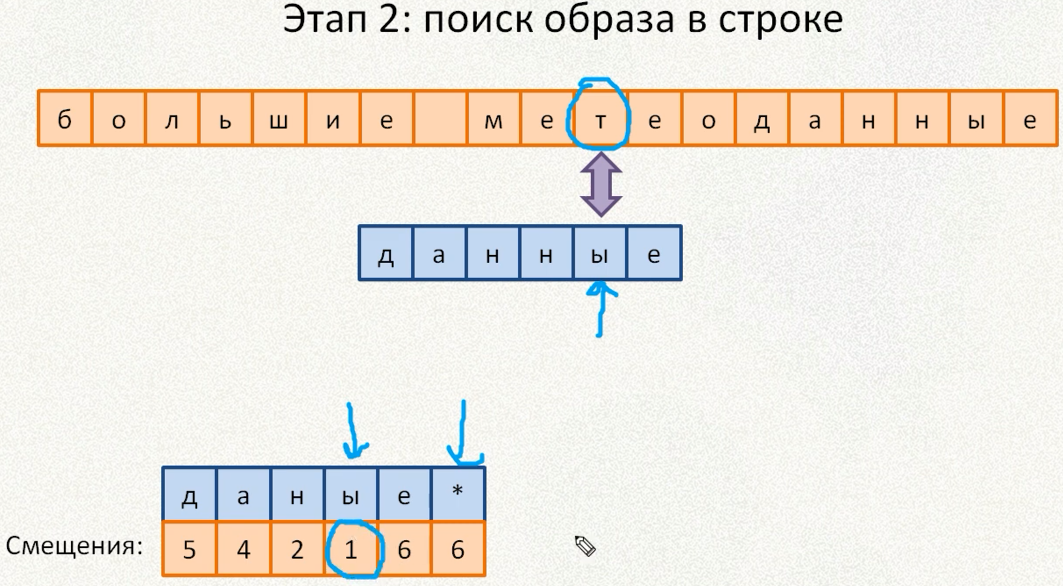

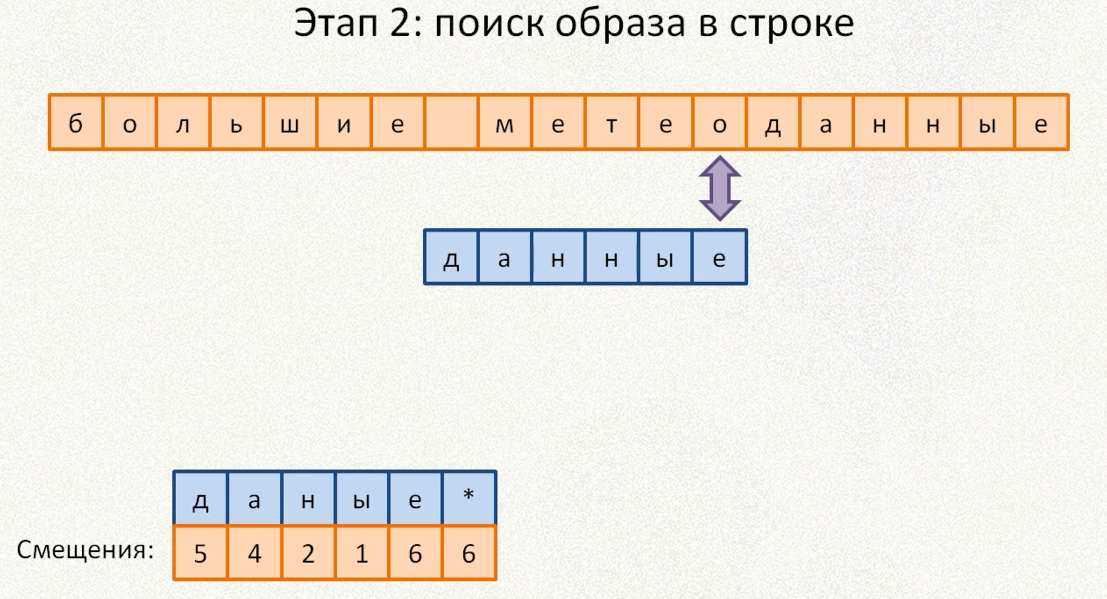

In [1]:
t = "данные"

# Этап 1: формирование таблицы смещений

S = set()  # уникальные символы в образе
M = len(t) # число символов в образе
d = {}     # словарь смещений

for i in range(M-2, -1, -1): # итерации с предпоследнего символа
    if t[i] not in S:        # если символ еще не добавлен в таблицу
        d[t[i]] = M-i-1
        S.add(t[i])

if t[M-1] not in S:     # отдельно формируем последний символ
    d[t[M-1]] = M

d['*'] = M              # смещения для прочих символов

print(d)

# Этап 2: поиск образа в строке

a = "метеоданные"
N = len(a)

if N >= M:
    i = M-1       # счетчик проверяемого символа в строке

    while(i < N):
        k = 0
        j = 0
        flBreak = False
        for j in range(M-1, -1, -1):
            if a[i-k] != t[j]:
                if j == M-1:
                    off = d[a[i]] if d.get(a[i], False) else d['*']  # смещение, если не равен последний символ образа
                else:
                    off = d[t[j]]   # смещение, если не равен не последний символ образа

                i += off    # смещение счетчика строки
                flBreak = True  # если несовпадение символа, то flBreak = True
                break

            k += 1          # смещение для сравниваемого символа в строке

        if not flBreak:          # если дошли до начала образа, значит, все его символы совпали
            print(f"образ найден по индексу {i-k+1}")
            break
    else:
        print("образ не найден")
else:
    print("образ не найден")

{'ы': 1, 'н': 2, 'а': 4, 'д': 5, 'е': 6, '*': 6}
образ найден по индексу 5
